## Multi Layer Perceptron Model

In [5]:
import torch
import torch.nn.functional as F 
import matplotlib.pyplot as plt 

In [6]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [7]:
len(words)

32033

In [8]:
# Build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [10]:
print(len(itos))

27


In [11]:
# build the dataset 
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    print(context)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
y = torch.tensor(Y)

emma
[0, 0, 0]
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
[0, 0, 0]
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
[0, 0, 0]
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
[0, 0, 0]
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
[0, 0, 0]
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [12]:
X.shape, X.dtype, y.shape, y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [13]:
# lookup table
C = torch.randn((27, 2))

In [22]:
C[5]

tensor([-0.7311,  0.6211])

In [24]:
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

tensor([-0.7311,  0.6211])

In [26]:
(C[:, 0] * F.one_hot(torch.tensor(5), num_classes = 27).float()).sum()

tensor(-0.7311)

In [28]:
C[[5,6,7]]

tensor([[-0.7311,  0.6211],
        [-0.4371, -0.5753],
        [ 0.7584, -1.6386]])

In [30]:
C[X].shape

torch.Size([32, 3, 2])

In [32]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [34]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [36]:
# emb @ W1 + b1

In [38]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[-0.5335, -0.0666, -0.5335, -0.0666, -0.5335, -0.0666],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.7311,  0.6211],
        [-0.5335, -0.0666, -0.7311,  0.6211,  1.1043,  0.3887],
        [-0.7311,  0.6211,  1.1043,  0.3887,  1.1043,  0.3887],
        [ 1.1043,  0.3887,  1.1043,  0.3887, -0.0332, -0.5119],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.5335, -0.0666],
        [-0.5335, -0.0666, -0.5335, -0.0666,  1.7972, -1.0666],
        [-0.5335, -0.0666,  1.7972, -1.0666,  0.6937, -0.6312],
        [ 1.7972, -1.0666,  0.6937, -0.6312,  1.3003, -0.0503],
        [ 0.6937, -0.6312,  1.3003, -0.0503, -0.0050,  0.3970],
        [ 1.3003, -0.0503, -0.0050,  0.3970,  1.3003, -0.0503],
        [-0.0050,  0.3970,  1.3003, -0.0503, -0.0332, -0.5119],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.5335, -0.0666],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.0332, -0.5119],
        [-0.5335, -0.0666, -0.0332, -0.5119, -0.0050,  0.3970],
        [-0.0332, -0.5119, -0.0050,  0.3

In [40]:
torch.cat(torch.unbind(emb, 1), axis=1)

tensor([[-0.5335, -0.0666, -0.5335, -0.0666, -0.5335, -0.0666],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.7311,  0.6211],
        [-0.5335, -0.0666, -0.7311,  0.6211,  1.1043,  0.3887],
        [-0.7311,  0.6211,  1.1043,  0.3887,  1.1043,  0.3887],
        [ 1.1043,  0.3887,  1.1043,  0.3887, -0.0332, -0.5119],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.5335, -0.0666],
        [-0.5335, -0.0666, -0.5335, -0.0666,  1.7972, -1.0666],
        [-0.5335, -0.0666,  1.7972, -1.0666,  0.6937, -0.6312],
        [ 1.7972, -1.0666,  0.6937, -0.6312,  1.3003, -0.0503],
        [ 0.6937, -0.6312,  1.3003, -0.0503, -0.0050,  0.3970],
        [ 1.3003, -0.0503, -0.0050,  0.3970,  1.3003, -0.0503],
        [-0.0050,  0.3970,  1.3003, -0.0503, -0.0332, -0.5119],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.5335, -0.0666],
        [-0.5335, -0.0666, -0.5335, -0.0666, -0.0332, -0.5119],
        [-0.5335, -0.0666, -0.0332, -0.5119, -0.0050,  0.3970],
        [-0.0332, -0.5119, -0.0050,  0.3

In [42]:
a = torch.arange(18)
a.shape

torch.Size([18])

In [56]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [58]:
a.storage()

C:\Users\yashs\AppData\Local\Temp\ipykernel_39172\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [60]:
emb.shape

torch.Size([32, 3, 2])

In [62]:
emb.view(32,6)

tensor([[-0.5620, -1.8524, -0.5620, -1.8524, -0.5620, -1.8524],
        [-0.5620, -1.8524, -0.5620, -1.8524, -0.2424,  0.8432],
        [-0.5620, -1.8524, -0.2424,  0.8432,  0.5747, -0.4097],
        [-0.2424,  0.8432,  0.5747, -0.4097,  0.5747, -0.4097],
        [ 0.5747, -0.4097,  0.5747, -0.4097,  0.4987, -0.5507],
        [-0.5620, -1.8524, -0.5620, -1.8524, -0.5620, -1.8524],
        [-0.5620, -1.8524, -0.5620, -1.8524,  0.6813,  1.5805],
        [-0.5620, -1.8524,  0.6813,  1.5805,  0.6124, -0.7991],
        [ 0.6813,  1.5805,  0.6124, -0.7991,  0.0908, -0.3304],
        [ 0.6124, -0.7991,  0.0908, -0.3304, -0.4820, -1.5566],
        [ 0.0908, -0.3304, -0.4820, -1.5566,  0.0908, -0.3304],
        [-0.4820, -1.5566,  0.0908, -0.3304,  0.4987, -0.5507],
        [-0.5620, -1.8524, -0.5620, -1.8524, -0.5620, -1.8524],
        [-0.5620, -1.8524, -0.5620, -1.8524,  0.4987, -0.5507],
        [-0.5620, -1.8524,  0.4987, -0.5507, -0.4820, -1.5566],
        [ 0.4987, -0.5507, -0.4820, -1.5

In [64]:
h = emb.view(-1, 6) @ W1 + b1

In [66]:
h.shape

torch.Size([32, 100])

In [68]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [70]:
h

tensor([[ 0.0722,  0.9647,  0.4833,  ...,  0.9590, -1.0000,  0.9994],
        [ 0.9951, -0.8495,  0.9793,  ...,  0.9334, -0.9857,  0.6108],
        [-0.1044,  0.9802, -0.9841,  ..., -0.4532, -0.9987,  0.7316],
        ...,
        [-0.9998,  0.9964,  0.5500,  ..., -0.9975, -0.9231,  0.0934],
        [-0.3461,  0.9934, -0.3259,  ...,  0.9148, -0.9898,  0.6927],
        [-0.3468,  0.9903, -0.9872,  ...,  0.4852, -0.9970,  0.0577]])

In [72]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [74]:
logits = h @ W2 + b2

In [76]:
logits.shape

torch.Size([32, 27])

In [78]:
counts = logits.exp()

In [80]:
prob = counts / counts.sum(dim=1, keepdims=True)

In [82]:
prob.shape

torch.Size([32, 27])

In [84]:
prob[0].sum()

tensor(1.)

In [86]:
Y

[5,
 13,
 13,
 1,
 0,
 15,
 12,
 9,
 22,
 9,
 1,
 0,
 1,
 22,
 1,
 0,
 9,
 19,
 1,
 2,
 5,
 12,
 12,
 1,
 0,
 19,
 15,
 16,
 8,
 9,
 1,
 0]

In [88]:
loss = -prob[torch.arange(32), y].log().mean()
loss

tensor(20.5007)

In [90]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [92]:
# _______________________new made respectable :) ------------------

In [302]:
X.shape, y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [303]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [304]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [305]:
# Forward pass
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum(dim=1, keepdims=True)
# loss = -prob[torch.arange(32), y].log().mean()
loss = F.cross_entropy(logits, y)
loss

tensor(17.7697)

In [306]:
F.cross_entropy(logits, y)

tensor(17.7697)

In [307]:
# why F.cross_entropy is better

In [308]:
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0., 0., 0., nan])

In [309]:
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

In [310]:
# we are getting nan because 100.exp() goes out of the range of floating point number.

how cross_entropy handles it ? -> by subtracting the maximum number from logits by every number.

In [312]:
logits = torch.tensor([-100, -3, 0, 100]) - 100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [313]:
for p in parameters:
    p.requires_grad = True

In [314]:

for _ in range(1000):
    # Forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(dim=1, keepdims=True)
    # loss = -prob[torch.arange(32), y].log().mean()
    loss = F.cross_entropy(logits, y)
    print(loss.item())
    
    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    for p in parameters:
        p.data += -0.1 * p.grad

17.769712448120117
13.656401634216309
11.2987699508667
9.452457427978516
7.984262943267822
6.891321182250977
6.100014686584473
5.452036380767822
4.8981523513793945
4.414664268493652
3.985848903656006
3.6028313636779785
3.262141704559326
2.96138072013855
2.6982967853546143
2.469712495803833
2.271660327911377
2.101283311843872
1.9571774005889893
1.837485909461975
1.7380962371826172
1.6535117626190186
1.5790897607803345
1.5117666721343994
1.4496046304702759
1.3913122415542603
1.335992455482483
1.2830525636672974
1.2321909666061401
1.1833816766738892
1.1367988586425781
1.092664122581482
1.051092267036438
1.0120266675949097
0.9752708077430725
0.9405565857887268
0.9076125621795654
0.8761920928955078
0.8460891842842102
0.817135751247406
0.7891990542411804
0.7621746063232422
0.7359815239906311
0.7105579972267151
0.6858608722686768
0.6618650555610657
0.6385654211044312
0.6159816980361938
0.5941658020019531
0.5732104182243347
0.5532562732696533
0.534488320350647
0.5171166062355042
0.501331210136

In [315]:
# let's do this with whole dataset 

In [316]:
# build the dataset 
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
y = torch.tensor(Y)

In [317]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [318]:
sum(p.nelement() for p in parameters)

3481

In [319]:
for p in parameters:
    p.requires_grad = True

In [320]:

for _ in range(10):
    # Forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, y)
    print(loss.item())
    
    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    for p in parameters:
        p.data += -0.1 * p.grad

19.505226135253906
17.08449363708496
15.776532173156738
14.833345413208008
14.002609252929688
13.253264427185059
12.57992172241211
11.98310661315918
11.470499992370605
11.051865577697754


In [321]:
torch.randint(0, X.shape[0], (32,))

tensor([220529, 131553,  35847, 111101,  12683, 227759, 198103, 106411, 141238,
         48411, 103164, 114608, 171199, 125218, 186919,  84625,  76692,  11477,
        197023, 171035,  98969, 152536, 220114,  91615, 172571,  20254, 117449,
        173758, 104847, 156561, 193264,  42388])

In [322]:
# Mini batch Gradient Descent and learning rate decay

In [323]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [324]:
for p in parameters:
    p.requires_grad = True

In [325]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre


In [326]:
lri = []
lossi = []
for i in range(10000):

    # minibatch construct 
    ix = torch.randint(0, X.shape[0], (32, ))
    # Forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, y[ix])

    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    # lr = lrs[i]
    # lr = 0.1
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats 
    # lri.append(lre[i])
    # lossi.append(loss.item())
print(loss.item())
    

2.5043270587921143


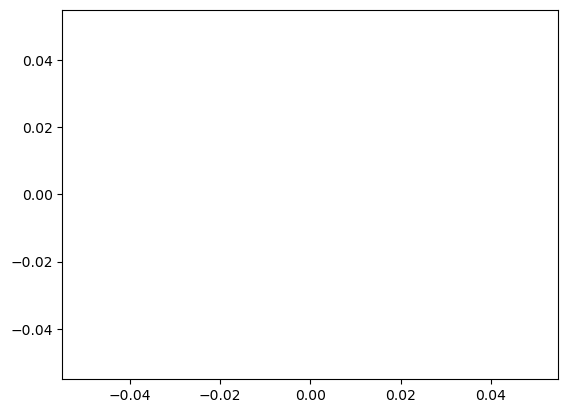

In [327]:
plt.plot(lri, lossi)

we can see the at -1 the loss is stable so 10**-1 = 0.1 is kinda good lr to choose.

In [329]:
# loss on whole dataset 
emb = C[X[ix]] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, y[ix])
loss

tensor(2.4551, grad_fn=<NllLossBackward0>)

### training split, dev/validation split, test split 
 80%, 10%, 10%

In [44]:
# build the dataset 
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])
    

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [332]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [333]:
for p in parameters:
    p.requires_grad = True

In [334]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre


In [335]:
lri = []
lossi = []
for i in range(10000):

    # minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    # Forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])

    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    # lr = lrs[i]
    lr = 0.1
    #lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats 
    # lri.append(lre[i])
    # lossi.append(loss.item())
print(loss.item())
    

2.062291383743286


In [336]:
# loss on whole training set 
# loss on whole dataset 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4958, grad_fn=<NllLossBackward0>)

In [337]:
# loss on dev dataset 
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4920, grad_fn=<NllLossBackward0>)

In [338]:
# let's increase the size of neural network

In [339]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [340]:
for p in parameters:
    p.requires_grad = True

In [341]:
lri = []
lossi = []
stepi = []
for i in range(300000):

    # minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    # Forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])

    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    # lr = lrs[i]
    lr = 0.1
    #lr = 0.01
    lr = 0.05
    for p in parameters:
        p.data += -lr * p.grad

    # track stats 
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())
print(loss.item())
    

2.7179644107818604


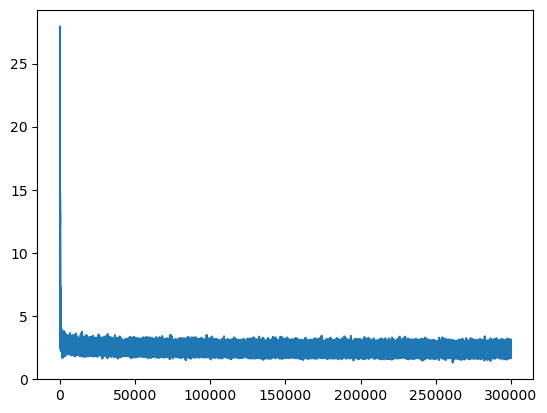

In [342]:
plt.plot(stepi, lossi)

In [343]:
# loss on dev dataset 
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2865, grad_fn=<NllLossBackward0>)

In [344]:
# loss on whole dataset 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2733, grad_fn=<NllLossBackward0>)

we have increased the size of the network but still the loss is not as much as low as we would expect.

### Let's try different embedding dimensions for the characters.

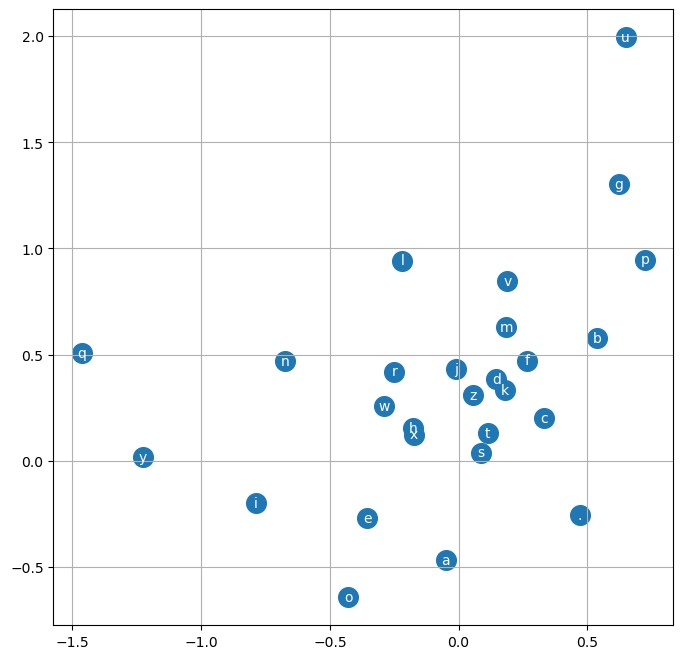

In [347]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [430]:
# --------------- now made respectable :) ------------

In [432]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [470]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [472]:
for p in parameters:
    p.requires_grad = True

In [474]:
lri = []
lossi = []
stepi = []

In [476]:

for i in range(200000):

    # minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    # Forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])

    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    # lr = lrs[i]
    #lr = 0.1
    lr = 0.1 if i < 100000 else 0.01
    #lr = 0.05
    for p in parameters:
        p.data += -lr * p.grad

    # track stats 
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())
    

2.1969664096832275


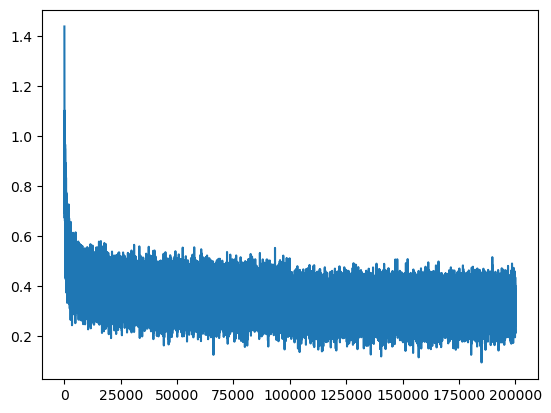

In [477]:
plt.plot(stepi, lossi)

In [478]:
# loss on whole training set 
# loss on whole dataset 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1205, grad_fn=<NllLossBackward0>)

In [479]:
# loss on dev dataset 
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1631, grad_fn=<NllLossBackward0>)

In [486]:
# sample from the model 
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break 
    print(''.join(itos[i] for i in out))

mona.
kayah.
seel.
nderyah.
reverstendrari.
aderediel.
izeli.
jen.
eden.
sana.
araelyzion.
kalin.
shub.
ridhimiest.
jairenlynn.
nopolonus.
kavder.
yarue.
els.
kayshia.


### E01: Tune the hyperparameters of the training to beat my best validation loss of 2.2

let's increase the character dimensions

In [490]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((45, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [492]:
for p in parameters:
    p.requires_grad = True

In [494]:
lri = []
lossi = []
stepi = []

In [533]:

for i in range(20000):

    # minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    # Forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])

    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    # lr = lrs[i]
    #lr = 0.1
    lr = 0.1 if i < 10000 else 0.01
    #lr = 0.05
    for p in parameters:
        p.data += -lr * p.grad

    # track stats 
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())
    

1.9105162620544434


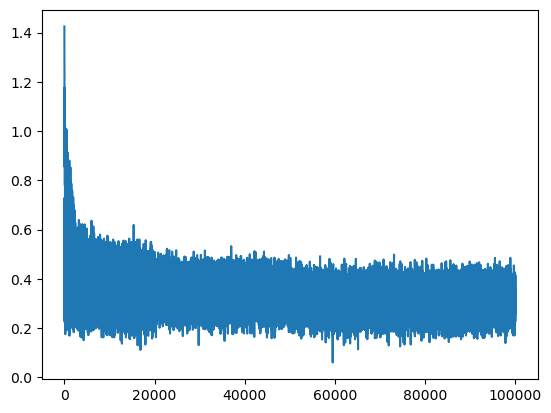

In [527]:
plt.plot(stepi, lossi)

In [535]:
# loss on whole training set 
# loss on whole dataset 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, C.shape[1] * 3) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0825, grad_fn=<NllLossBackward0>)

In [537]:
# loss on dev dataset 
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, C.shape[1] * 3) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1457, grad_fn=<NllLossBackward0>)

In [539]:
# let's try to increase the neurons

In [565]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((45, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [543]:
for p in parameters:
    p.requires_grad = True

In [545]:
lri = []
lossi = []
stepi = []

In [559]:

for i in range(20000):

    # minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    # Forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])

    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    # lr = lrs[i]
    #lr = 0.1
    lr = 0.1 if i < 10000 else 0.01
    #lr = 0.05
    for p in parameters:
        p.data += -lr * p.grad

    # track stats 
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())
    

1.9718023538589478


In [561]:
# loss on whole training set 
# loss on whole dataset 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, C.shape[1] * 3) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0857, grad_fn=<NllLossBackward0>)

In [563]:
# loss on dev dataset 
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, C.shape[1] * 3) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1680, grad_fn=<NllLossBackward0>)

In [567]:
# let's try to increase the layers.

In [100]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((45, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn(100, 20, generator=g)
b2 = torch.randn(20, generator=g)
W3 = torch.randn((20, 27), generator=g)
b3 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2, W3, b3]

In [102]:
for p in parameters:
    p.requires_grad = True

In [104]:
lri = []
lossi = []
stepi = []

In [164]:

for i in range(20000):

    # minibatch construct 
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    # Forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
    logits = h @ W2 + b2 
    logits = logits @ W3 + b3
    loss = F.cross_entropy(logits, Ytr[ix])

    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward()
    # update 
    # lr = lrs[i]
    #lr = 0.1
    lr = 0.1 if i < 10000 else 0.01
    #lr = 0.05
    for p in parameters:
        p.data += -lr * p.grad

    # track stats 
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())
    

2.087174892425537


In [165]:
# loss on whole training set 
# loss on whole dataset 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, C.shape[1] * 3) @ W1 + b1)
logits = h @ W2 + b2 
logits = logits @ W3 + b3
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1243, grad_fn=<NllLossBackward0>)

In [166]:
# loss on dev dataset 
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, C.shape[1] * 3) @ W1 + b1)
logits = h @ W2 + b2 
logits = logits @ W3 + b3
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1653, grad_fn=<NllLossBackward0>)

### Let's increase the context length and also increase the batch size.

In [46]:
# build the dataset 
def build_dataset(words):
    block_size = 5 # increase the context length to 6.
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])
    

torch.Size([182580, 5]) torch.Size([182580])
torch.Size([22767, 5]) torch.Size([22767])
torch.Size([22799, 5]) torch.Size([22799])


In [63]:
g = torch.Generator().manual_seed(2147483647)

# Smaller initialization for stability
C = torch.randn((27, 15), generator=g) * 0.01
W1 = torch.randn((75, 100), generator=g) * 0.01
b1 = torch.zeros(100)  # Bias initialized to zero

W2 = torch.randn((100, 50), generator=g) * 0.01
b2 = torch.zeros(50)

W3 = torch.randn((50, 20), generator=g) * 0.01
b3 = torch.zeros(20)

W4 = torch.randn((20, 27), generator=g) * 0.01
b4 = torch.zeros(27)

parameters = [C, W1, b1, W2, b2, W3, b3, W4, b4]


In [65]:
for p in parameters:
    p.requires_grad = True

In [67]:
lri = []
lossi = []
stepi = []

In [71]:
for i in range(300000):
    ix = torch.randint(0, Xtr.shape[0], (64, ))

    # Forward pass
    emb = C[Xtr[ix]]  
    h1 = torch.tanh(emb.view(64, -1) @ W1 + b1) 
    h2 = torch.tanh(h1 @ W2 + b2) 
    h3 = torch.tanh(h2 @ W3 + b3)  
    logits = h3 @ W4 + b4  
    
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Check for NaNs in gradients
    for p in parameters:
        if torch.isnan(p.grad).any():
            print(f"NaN detected in {p.shape} gradients! Stopping training.")
            break

    # Update
    if i < 100000:
        lr = 0.1
    elif i < 200000:
        lr = 0.01
    else:
        lr = 0.001
    for p in parameters:
        p.data -= lr * p.grad

    if i % 5000 == 0:
        print(f"Step {i}, Loss: {loss.item()}")

    stepi.append(i)
    
    lossi.append(loss.log10().item())

print(f"Final Loss: {loss.item()}")


Step 0, Loss: 3.295837163925171
Step 5000, Loss: 2.8036069869995117
Step 10000, Loss: 2.7594826221466064
Step 15000, Loss: 2.9937682151794434
Step 20000, Loss: 2.9829862117767334
Step 25000, Loss: 2.8003857135772705
Step 30000, Loss: 2.888152599334717
Step 35000, Loss: 2.484549045562744
Step 40000, Loss: 2.6123039722442627
Step 45000, Loss: 2.496232032775879
Step 50000, Loss: 2.268813371658325
Step 55000, Loss: 2.220885992050171
Step 60000, Loss: 2.072394371032715
Step 65000, Loss: 1.8643895387649536
Step 70000, Loss: 1.9451502561569214
Step 75000, Loss: 2.0831542015075684
Step 80000, Loss: 2.0577597618103027
Step 85000, Loss: 1.957531213760376
Step 90000, Loss: 1.9600114822387695
Step 95000, Loss: 2.10398530960083
Step 100000, Loss: 2.2864372730255127
Step 105000, Loss: 2.3009800910949707
Step 110000, Loss: 2.1937739849090576
Step 115000, Loss: 2.0032882690429688
Step 120000, Loss: 1.7530044317245483
Step 125000, Loss: 2.1227242946624756
Step 130000, Loss: 1.7341833114624023
Step 1350

In [288]:
# check for null values in gradients 
for p in parameters:
    if torch.isnan(p.grad).any():
        print('Nan Detected in gradients!')
        break

Nan Detected in gradients!


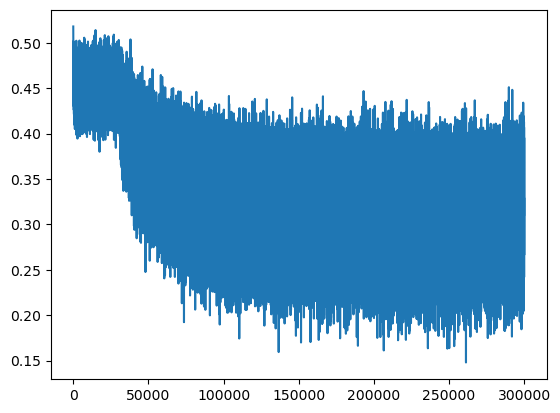

In [73]:
plt.plot(stepi, lossi)

In [75]:
# loss on whole training set 
# loss on whole dataset 
# Compute embeddings
emb = C[Xtr]  # Shape: (N, 3, 15), where N is the number of training samples

# Forward pass with tanh activation
h1 = torch.tanh(emb.view(-1, 75) @ W1 + b1)  # (N, 100)
h2 = torch.tanh(h1 @ W2 + b2)  # (N, 50)
h3 = torch.tanh(h2 @ W3 + b3)  # (N, 20)
logits = h3 @ W4 + b4  # (N, 27) → Final logits

# Compute loss
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0486, grad_fn=<NllLossBackward0>)

In [77]:
# Compute embeddings for dev set
emb = C[Xdev]  # Shape: (N_dev, 3, 15), where N_dev is the dev set size

# Forward pass with tanh activations
h1 = torch.tanh(emb.view(-1, 75) @ W1 + b1)  # (N_dev, 100)
h2 = torch.tanh(h1 @ W2 + b2)  # (N_dev, 50)
h3 = torch.tanh(h2 @ W3 + b3)  # (N_dev, 20)
logits = h3 @ W4 + b4  # (N_dev, 27) → Final logits

# Compute loss
loss = F.cross_entropy(logits, Ydev)
loss


tensor(2.1001, grad_fn=<NllLossBackward0>)

#### Let's Try different activation function i.e ReLU

In [95]:
g = torch.Generator().manual_seed(2147483647)

# Smaller initialization for stability
C = torch.randn((27, 15), generator=g) * 0.01
W1 = torch.randn((75, 100), generator=g) * 0.01
b1 = torch.zeros(100)  # Bias initialized to zero

W2 = torch.randn((100, 50), generator=g) * 0.01
b2 = torch.zeros(50)

W3 = torch.randn((50, 20), generator=g) * 0.01
b3 = torch.zeros(20)

W4 = torch.randn((20, 27), generator=g) * 0.01
b4 = torch.zeros(27)

parameters = [C, W1, b1, W2, b2, W3, b3, W4, b4]


In [97]:
for p in parameters:
    p.requires_grad = True

In [99]:
lri = []
lossi = []
stepi = []

In [101]:
for i in range(300000):
    ix = torch.randint(0, Xtr.shape[0], (128, ))

    # Forward pass
    emb = C[Xtr[ix]]  
    h1 = torch.relu(emb.view(128, -1) @ W1 + b1) 
    h2 = torch.relu(h1 @ W2 + b2) 
    h3 = torch.relu(h2 @ W3 + b3)  
    logits = h3 @ W4 + b4  
    
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Check for NaNs in gradients
    for p in parameters:
        if torch.isnan(p.grad).any():
            print(f"NaN detected in {p.shape} gradients! Stopping training.")
            break

    # Update
    if i < 100000:
        lr = 0.1
    elif i < 200000:
        lr = 0.01
    else:
        lr = 0.001
    for p in parameters:
        p.data -= lr * p.grad

    if i % 5000 == 0:
        print(f"Step {i}, Loss: {loss.item()}")

    stepi.append(i)
    
    lossi.append(loss.log10().item())

print(f"Final Loss: {loss.item()}")


Step 0, Loss: 3.295837163925171
Step 5000, Loss: 2.7742631435394287
Step 10000, Loss: 2.8652031421661377
Step 15000, Loss: 2.822448968887329
Step 20000, Loss: 2.8135459423065186
Step 25000, Loss: 2.8570613861083984
Step 30000, Loss: 2.8325603008270264
Step 35000, Loss: 2.8566348552703857
Step 40000, Loss: 2.8658978939056396
Step 45000, Loss: 2.6806704998016357
Step 50000, Loss: 2.4194579124450684
Step 55000, Loss: 2.3871569633483887
Step 60000, Loss: 2.1028289794921875
Step 65000, Loss: 2.357569932937622
Step 70000, Loss: 2.0631556510925293
Step 75000, Loss: 2.075457811355591
Step 80000, Loss: 1.8698371648788452
Step 85000, Loss: 2.1471219062805176
Step 90000, Loss: 2.189058780670166
Step 95000, Loss: 2.026042938232422
Step 100000, Loss: 1.9235273599624634
Step 105000, Loss: 1.7545360326766968
Step 110000, Loss: 2.0697968006134033
Step 115000, Loss: 2.007225275039673
Step 120000, Loss: 2.05271315574646
Step 125000, Loss: 1.966333270072937
Step 130000, Loss: 1.9778181314468384
Step 1350

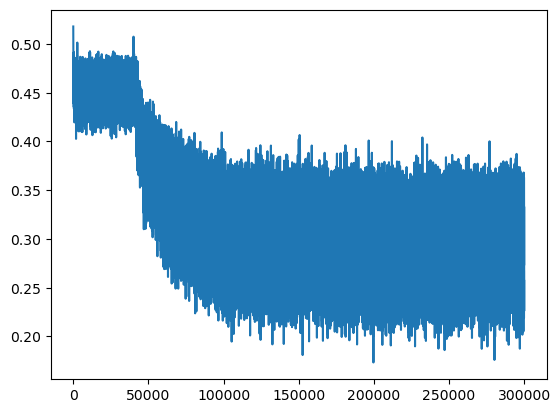

In [103]:
plt.plot(stepi, lossi)

In [105]:
# loss on whole training set 
# loss on whole dataset 
# Compute embeddings
emb = C[Xtr]  # Shape: (N, 3, 15), where N is the number of training samples

# Forward pass with tanh activation
h1 = torch.relu(emb.view(-1, 75) @ W1 + b1)  # (N, 100)
h2 = torch.relu(h1 @ W2 + b2)  # (N, 50)
h3 = torch.relu(h2 @ W3 + b3)  # (N, 20)
logits = h3 @ W4 + b4  # (N, 27) → Final logits

# Compute loss
loss = F.cross_entropy(logits, Ytr)
loss

tensor(1.9716, grad_fn=<NllLossBackward0>)

In [107]:
# Compute embeddings for dev set
emb = C[Xdev]  # Shape: (N_dev, 3, 15), where N_dev is the dev set size

# Forward pass with tanh activations
h1 = torch.relu(emb.view(-1, 75) @ W1 + b1)  # (N_dev, 100)
h2 = torch.relu(h1 @ W2 + b2)  # (N_dev, 50)
h3 = torch.relu(h2 @ W3 + b3)  # (N_dev, 20)
logits = h3 @ W4 + b4  # (N_dev, 27) → Final logits

# Compute loss
loss = F.cross_entropy(logits, Ydev)
loss


tensor(2.0749, grad_fn=<NllLossBackward0>)

In [119]:
import torch
import torch.nn.functional as F

g = torch.Generator().manual_seed(2147483647)

block_size = 5  # Ensure block_size * 15 = 75

for _ in range(20):
    out = []
    context = [0] * block_size  # Initialize context with padding tokens

    while True:
        emb = C[torch.tensor(context).unsqueeze(0)]  # Shape: (1, block_size, 15)
        h1 = torch.relu(emb.view(1, 75) @ W1 + b1)  # (1, 75) -> (1, 100)
        h2 = torch.relu(h1 @ W2 + b2)  # (1, 100) -> (1, 50)
        h3 = torch.relu(h2 @ W3 + b3)  # (1, 50) -> (1, 20)
        logits = h3 @ W4 + b4  # (1, 20) -> (1, 27)

        probs = F.softmax(logits, dim=1)  # Convert logits to probabilities
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()  # Sample next token

        context = context[1:] + [ix]  # Shift context window
        out.append(ix)

        if ix == 0:
            break  # Stop at the end token

    print(''.join(itos[i] for i in out))  # Convert indices to text


juniel.
jayanah.
prefay.
adin.
korin.
tolia.
sareem.
sameia.
zamirene.
jedby.
inrolettes.
jaina.
laree.
farmunt.
afontume.
ponneliah.
jaylie.
raaya.
jocelynn.
brinnie.


### E02: I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?

## (1) Loss with Perfectly Uniform Predicted Probabilities

**Problem:** What is the loss if the predicted probabilities at initialization are perfectly uniform?

**Solution:**

* If the model predicts uniform probabilities for all classes, then:
    $$p(y) = \frac{1}{27}$$
    where 27 is the number of classes.

* The cross-entropy loss is defined as:
    $$Loss = -\sum p_{true} \log(p_{predicted})$$

* Since the true distribution is one-hot (i.e., only one class has probability 1), and the predicted probability is uniform, the loss simplifies to:
    $$Loss = -\log\left(\frac{1}{27}\right) = \log(27)$$

**Explanation:**

The cross-entropy loss measures the difference between the true probability distribution and the predicted probability distribution. When the predicted probabilities are uniform, it means the model is equally unsure about all classes. The loss is then calculated as the negative logarithm of the predicted probability, which in this case, simplifies to the logarithm of the number of classes.

**Result:**

The loss when predicted probabilities are perfectly uniform is $\log(27)$.

In [128]:
import math
uniform_loss = math.log(27)
print(uniform_loss)  # Output: ~3.2958


3.295836866004329


## (2) Tuning Initialization to Achieve Uniform Loss

**Problem:** Can we tune the initialization of our neural network to achieve the uniform loss calculated in part (1), which is $\log(27)$?

**Analysis:**

* Our current weight initialization might be causing unstable activations, leading to exploding or vanishing gradients.
* To match the uniform loss at initialization, we need to ensure that:
    * **We use smaller initial weights.**
    * **The logits (the raw, unnormalized outputs of the network) are near zero initially.** This will result in softmax outputs that are close to uniform probabilities.

**Fixed Initialization Approach:**

* **Xavier (Glorot) Initialization:** We should use Xavier (Glorot) initialization. This technique is designed to ensure that the activations are neither too small nor too large, preventing the problems of exploding or vanishing gradients.

**Explanation:**

* **Why Smaller Weights?** Smaller initial weights help prevent the activations from becoming too large, which can lead to instability during training.
* **Why Near-Zero Logits?** If the logits are near zero, the softmax function, which converts logits into probabilities, will produce outputs that are close to uniform. This aligns with the condition for achieving the loss $\log(27)$, as we calculated in the previous step.
* **Xavier Initialization:** Xavier initialization is a specific method that initializes weights based on the number of input and output neurons. It helps to keep the variance of the activations consistent across layers, which is crucial for stable training.

**Conclusion:**

By using Xavier initialization, we can achieve logits that are close to zero initially and thus match the uniform loss of $\log(27)$. This approach helps to stabilize the training process and prevent issues related to gradient instability.

In [151]:
import torch

g = torch.Generator().manual_seed(2147483647)

def xavier_init(shape, gain=1.0):
    fan_in, fan_out = shape
    std = gain * torch.sqrt(torch.tensor(2.0 / (fan_in + fan_out)))
    return torch.randn(shape, generator=g) * std

C = torch.randn((27, 15), generator=g) * 0.01  # Keep embedding small

W1 = xavier_init((75, 100))
b1 = torch.zeros(100)

W2 = xavier_init((100, 50))
b2 = torch.zeros(50)

W3 = xavier_init((50, 20))
b3 = torch.zeros(20)

W4 = xavier_init((20, 27))
b4 = torch.zeros(27)

parameters = [C, W1, b1, W2, b2, W3, b3, W4, b4]

In [153]:
for p in parameters:
    p.requires_grad = True

In [155]:
lri = []
lossi = []
stepi = []

In [157]:
for i in range(300000):
    ix = torch.randint(0, Xtr.shape[0], (128, ))

    # Forward pass
    emb = C[Xtr[ix]]  
    h1 = torch.relu(emb.view(128, -1) @ W1 + b1) 
    h2 = torch.relu(h1 @ W2 + b2) 
    h3 = torch.relu(h2 @ W3 + b3)  
    logits = h3 @ W4 + b4  
    
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Check for NaNs in gradients
    for p in parameters:
        if torch.isnan(p.grad).any():
            print(f"NaN detected in {p.shape} gradients! Stopping training.")
            break

    # Update
    if i < 100000:
        lr = 0.1
    elif i < 200000:
        lr = 0.01
    else:
        lr = 0.001
    for p in parameters:
        p.data -= lr * p.grad

    if i % 5000 == 0:
        print(f"Step {i}, Loss: {loss.item()}")

    stepi.append(i)
    
    lossi.append(loss.log10().item())

print(f"Final Loss: {loss.item()}")


Step 0, Loss: 3.2964093685150146
Step 5000, Loss: 2.206331729888916
Step 10000, Loss: 2.115135908126831
Step 15000, Loss: 2.0690717697143555
Step 20000, Loss: 2.0869383811950684
Step 25000, Loss: 2.0768680572509766
Step 30000, Loss: 1.8469353914260864
Step 35000, Loss: 2.0504353046417236
Step 40000, Loss: 2.080244302749634
Step 45000, Loss: 1.9784144163131714
Step 50000, Loss: 1.8735493421554565
Step 55000, Loss: 1.9624056816101074
Step 60000, Loss: 1.992120623588562
Step 65000, Loss: 1.6696857213974
Step 70000, Loss: 2.0856072902679443
Step 75000, Loss: 1.9309687614440918
Step 80000, Loss: 1.858629822731018
Step 85000, Loss: 2.054560422897339
Step 90000, Loss: 1.807992696762085
Step 95000, Loss: 2.195901870727539
Step 100000, Loss: 1.8600302934646606
Step 105000, Loss: 1.8060983419418335
Step 110000, Loss: 1.8379640579223633
Step 115000, Loss: 1.9190216064453125
Step 120000, Loss: 1.7918598651885986
Step 125000, Loss: 2.0727269649505615
Step 130000, Loss: 2.0376546382904053
Step 13500

In [159]:
# loss on whole training set 
# loss on whole dataset 
# Compute embeddings
emb = C[Xtr]  # Shape: (N, 3, 15), where N is the number of training samples

# Forward pass with tanh activation
h1 = torch.relu(emb.view(-1, 75) @ W1 + b1)  # (N, 100)
h2 = torch.relu(h1 @ W2 + b2)  # (N, 50)
h3 = torch.relu(h2 @ W3 + b3)  # (N, 20)
logits = h3 @ W4 + b4  # (N, 27) → Final logits

# Compute loss
loss = F.cross_entropy(logits, Ytr)
loss

tensor(1.9018, grad_fn=<NllLossBackward0>)

In [161]:
# Compute embeddings for dev set
emb = C[Xdev]  # Shape: (N_dev, 3, 15), where N_dev is the dev set size

# Forward pass with tanh activations
h1 = torch.relu(emb.view(-1, 75) @ W1 + b1)  # (N_dev, 100)
h2 = torch.relu(h1 @ W2 + b2)  # (N_dev, 50)
h3 = torch.relu(h2 @ W3 + b3)  # (N_dev, 20)
logits = h3 @ W4 + b4  # (N_dev, 27) → Final logits

# Compute loss
loss = F.cross_entropy(logits, Ydev)
loss


tensor(2.0452, grad_fn=<NllLossBackward0>)

In [163]:
import torch
import torch.nn.functional as F

g = torch.Generator().manual_seed(2147483647)

block_size = 5  # Ensure block_size * 15 = 75

for _ in range(20):
    out = []
    context = [0] * block_size  # Initialize context with padding tokens

    while True:
        emb = C[torch.tensor(context).unsqueeze(0)]  # Shape: (1, block_size, 15)
        h1 = torch.relu(emb.view(1, 75) @ W1 + b1)  # (1, 75) -> (1, 100)
        h2 = torch.relu(h1 @ W2 + b2)  # (1, 100) -> (1, 50)
        h3 = torch.relu(h2 @ W3 + b3)  # (1, 50) -> (1, 20)
        logits = h3 @ W4 + b4  # (1, 20) -> (1, 27)

        probs = F.softmax(logits, dim=1)  # Convert logits to probabilities
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()  # Sample next token

        context = context[1:] + [ix]  # Shift context window
        out.append(ix)

        if ix == 0:
            break  # Stop at the end token

    print(''.join(itos[i] for i in out))  # Convert indices to text


junide.
jakari.
julifaana.
nailoh.
rito.
sabrageem.
sameia.
yanilena.
jedbyanna.
imbryse.
sieve.
arter.
nouland.
foette.
maryas.
jahriani.
core.
yaelon.
kaelani.
westoni.
